<a href="https://colab.research.google.com/github/nafis-saad/Machine-Learning-_-Data-Preprocessing-/blob/main/Car_Data_preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
car_data = pd.read_csv("/content/drive/MyDrive/Python_Data Processing /Car_Crash/Crash_Data.csv")
car_data.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(52843, 23)

In [ ]:
# Suffle the data set 
#The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means to return all rows (in random order)
# Here, specifying drop=True prevents .reset_index from creating a column containing the old index entries.
car_data = car_data.sample(frac=1).reset_index(drop=True)


In [ ]:
# reading the name of column 
car_data.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day'],
      dtype='object')

In [ ]:
car_data.head(10)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,19955146,WA,2,1995,Saturday,2:30,Single,No,NaN,No,...,18,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night
1,20134006,SA,6,2013,Monday,8:50,Multiple,No,No,Yes,...,71,NaN,NaN,NaN,NaN,No,No,65_to_74,Weekday,Day
2,20062209,Vic,6,2006,Saturday,18:35,Single,No,No,No,...,84,NaN,NaN,NaN,NaN,No,No,75_or_older,Weekend,Night
3,19957042,NT,4,1995,Wednesday,21:31,Single,No,NaN,No,...,33,NaN,NaN,NaN,NaN,No,No,26_to_39,Weekday,Night
4,19965020,WA,6,1996,Saturday,23:09,Single,No,NaN,No,...,24,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Night
5,20085073,WA,3,2008,Saturday,16:21,Multiple,No,No,No,...,43,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekend,Day
6,20095026,WA,12,2009,Wednesday,1:05,Multiple,No,Yes,No,...,41,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Night
7,20052014,Vic,4,2005,Wednesday,7:00,Single,No,No,No,...,29,NaN,NaN,NaN,NaN,No,No,26_to_39,Weekday,Day
8,19924029,SA,5,1992,Saturday,9:00,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,No,No,17_to_25,Weekend,Day
9,20133115,Qld,6,2013,Saturday,17:00,Single,No,No,No,...,68,NaN,NaN,NaN,NaN,No,No,65_to_74,Weekend,Day


In [ ]:
#memory Usage is a Panda Function- Index and Deep( deep usally introspect the memory usage info)
# Describe is shows the simple statistics for the numerical attribute
# Head counts from first row, Tail Count from Last row and Sample takes random rows

def fast_intro(car_data):
    print("------Summary-----\n")
    print(car_data.info(memory_usage = "deep"))
    print("\n------Descriptive and Quartile Statistics------\n")
    print(car_data.describe())
    print("\n------1st 10 rows------\n")
    print(car_data.head(10), end ="")
    print("\n------last 10 rows------\n")
    print(car_data.tail(10),end ="")
    print("\n------Random 10 rows------\n")
    print(car_data.sample(10), end ="")
fast_intro(car_data)

------Summary-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non

In [ ]:
# get the number of missing data points per column

missing_values_count = car_data.isnull().sum()
print(missing_values_count)

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64


In [ ]:
total_cells = np.product(car_data.shape) # multiplication of number of rows and coloumns 
total_missing = missing_values_count.sum() # sum of the total missing value cell
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

16.887597304237573


In [ ]:
# Removing Columns with Large Amount of Missing Values

columns_to_be_removed = ["National Remoteness Areas","SA4 Name 2016","National LGA Name 2017","National Road Type","Heavy Rigid Truck Involvement",'Crash ID']
for col in columns_to_be_removed:
    car_data.drop([col], axis=1, inplace=True)


In [ ]:
car_data

,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,WA,2,1995,Saturday,2:30,Single,No,No,80,Passenger,Female,18,No,No,17_to_25,Weekend,Night
1,SA,6,2013,Monday,8:50,Multiple,No,Yes,100,Driver,Male,71,No,No,65_to_74,Weekday,Day
2,Vic,6,2006,Saturday,18:35,Single,No,No,60,Pedestrian,Male,84,No,No,75_or_older,Weekend,Night
3,NT,4,1995,Wednesday,21:31,Single,No,No,70,Pedestrian,Male,33,No,No,26_to_39,Weekday,Night
4,WA,6,1996,Saturday,23:09,Single,No,No,60,Passenger,Male,24,No,No,17_to_25,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,Qld,5,1989,Tuesday,18:00,Single,No,No,60,Pedestrian,Male,41,No,No,40_to_64,Weekday,Night
52839,Vic,1,2015,Thursday,6:51,Single,No,No,70,Driver,Male,28,Yes,No,26_to_39,Weekday,Day
52840,WA,11,1996,Tuesday,6:15,Multiple,No,No,110,Driver,Male,18,No,No,17_to_25,Weekday,Day
52841,NSW,9,1999,Friday,18:45,Single,No,No,90,Pedestrian,Male,19,No,No,17_to_25,Weekend,Night


In [ ]:
missing_values_count_updated = car_data.isnull().sum()
print(missing_values_count_updated)
car_data

State                              0
Month                              0
Year                               0
Dayweek                            0
Time                              40
Crash Type                         0
Bus Involvement                   22
Articulated Truck Involvement     22
Speed Limit                      702
Road User                          0
Gender                            27
Age                                0
Christmas Period                   0
Easter Period                      0
Age Group                         90
Day of week                        0
Time of day                        0
dtype: int64


,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,WA,2,1995,Saturday,2:30,Single,No,No,80,Passenger,Female,18,No,No,17_to_25,Weekend,Night
1,SA,6,2013,Monday,8:50,Multiple,No,Yes,100,Driver,Male,71,No,No,65_to_74,Weekday,Day
2,Vic,6,2006,Saturday,18:35,Single,No,No,60,Pedestrian,Male,84,No,No,75_or_older,Weekend,Night
3,NT,4,1995,Wednesday,21:31,Single,No,No,70,Pedestrian,Male,33,No,No,26_to_39,Weekday,Night
4,WA,6,1996,Saturday,23:09,Single,No,No,60,Passenger,Male,24,No,No,17_to_25,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,Qld,5,1989,Tuesday,18:00,Single,No,No,60,Pedestrian,Male,41,No,No,40_to_64,Weekday,Night
52839,Vic,1,2015,Thursday,6:51,Single,No,No,70,Driver,Male,28,Yes,No,26_to_39,Weekday,Day
52840,WA,11,1996,Tuesday,6:15,Multiple,No,No,110,Driver,Male,18,No,No,17_to_25,Weekday,Day
52841,NSW,9,1999,Friday,18:45,Single,No,No,90,Pedestrian,Male,19,No,No,17_to_25,Weekend,Night


In [ ]:
# get a small subset of the Car crash dataset
subset_car_data = car_data.loc[0:10, 'Dayweek':'Gender']
subset_car_data
# We can use the Panda's fillna() function to fill in missing values in a dataframe for us.
# One option we have is to specify what we want the NaN values to be replaced with. Here, 
# I'm saying that I would like to replace all the NaN values with 0.

,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender
0,Saturday,2:30,Single,No,No,80,Passenger,Female
1,Monday,8:50,Multiple,No,Yes,100,Driver,Male
2,Saturday,18:35,Single,No,No,60,Pedestrian,Male
3,Wednesday,21:31,Single,No,No,70,Pedestrian,Male
4,Saturday,23:09,Single,No,No,60,Passenger,Male
5,Saturday,16:21,Multiple,No,No,110,Motorcycle rider,Male
6,Wednesday,1:05,Multiple,No,No,110,Driver,Male
7,Wednesday,7:00,Single,No,No,110,Driver,Male
8,Saturday,9:00,Single,No,No,110,Driver,Male
9,Saturday,17:00,Single,No,No,100,Passenger,Female


In [ ]:
# Arranging the "Time" Column for Convenience when Visualizing the Data
car_data["Time"] = car_data["Time"].str.split(":").str.join(".")
display(car_data.head(10))

,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,WA,2,1995,Saturday,2.30,Single,No,No,80,Passenger,Female,18,No,No,17_to_25,Weekend,Night
1,SA,6,2013,Monday,8.50,Multiple,No,Yes,100,Driver,Male,71,No,No,65_to_74,Weekday,Day
2,Vic,6,2006,Saturday,18.35,Single,No,No,60,Pedestrian,Male,84,No,No,75_or_older,Weekend,Night
3,NT,4,1995,Wednesday,21.31,Single,No,No,70,Pedestrian,Male,33,No,No,26_to_39,Weekday,Night
4,WA,6,1996,Saturday,23.09,Single,No,No,60,Passenger,Male,24,No,No,17_to_25,Weekend,Night
5,WA,3,2008,Saturday,16.21,Multiple,No,No,110,Motorcycle rider,Male,43,No,No,40_to_64,Weekend,Day
6,WA,12,2009,Wednesday,1.05,Multiple,No,No,110,Driver,Male,41,No,No,40_to_64,Weekday,Night
7,Vic,4,2005,Wednesday,7.00,Single,No,No,110,Driver,Male,29,No,No,26_to_39,Weekday,Day
8,SA,5,1992,Saturday,9.00,Single,No,No,110,Driver,Male,19,No,No,17_to_25,Weekend,Day
9,Qld,6,2013,Saturday,17.00,Single,No,No,100,Passenger,Female,68,No,No,65_to_74,Weekend,Day


In [ ]:
car_data["Time"] = car_data["Time"].astype(float)
car_data["Time"].dtype



dtype('float64')

In [ ]:
# Handling Missing Values
car_data["Time"].fillna(car_data["Time"].median(), inplace=True)

In [ ]:
impute_mode_cols = ["Bus Involvement","Articulated Truck Involvement","Speed Limit","Gender","Age Group"]
for col in impute_mode_cols:
    car_data[col].fillna(car_data[col].mode()[0], inplace=True)

In [ ]:
car_data.isnull().sum()

State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

In [ ]:
car_data.sample(10)

,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
34323,NSW,12,1989,Friday,3.30,Multiple,Yes,No,100,Passenger,Female,16,No,No,0_to_16,Weekday,Night
22024,NSW,10,1989,Sunday,17.00,Multiple,No,No,80,Driver,Male,40,No,No,40_to_64,Weekend,Day
12070,Vic,8,1994,Friday,16.55,Multiple,No,No,60,Motorcycle rider,Male,21,No,No,17_to_25,Weekday,Day
43906,NSW,1,1992,Thursday,19.30,Single,No,No,60,Driver,Male,16,No,No,0_to_16,Weekday,Night
46646,Vic,1,1995,Sunday,16.35,Multiple,No,No,100,Driver,Female,66,No,No,65_to_74,Weekend,Day
20950,Tas,11,1990,Sunday,20.55,Single,No,No,100,Passenger,Male,40,No,No,40_to_64,Weekend,Night
12120,Vic,9,2000,Saturday,21.53,Multiple,No,No,60,Passenger,Male,21,No,No,17_to_25,Weekend,Night
16997,NSW,4,2008,Sunday,13.00,Multiple,No,No,100,Driver,Female,31,No,Yes,26_to_39,Weekend,Day
19342,NT,4,2021,Wednesday,23.00,Single,No,No,110,Driver,Female,44,No,No,40_to_64,Weekday,Night
25543,NSW,5,1999,Sunday,16.30,Single,No,No,60,Pedestrian,Male,82,No,No,75_or_older,Weekend,Day


In [ ]:
# In this data sheet all features can be repeatative, so identifying the unique doesn't make any sense. only for practice purposes

print("Unique Content :",len(list(set(car_data['Speed Limit']))))
print("Total rows :",len(car_data))

Unique Content : 30
Total rows : 52843


In [ ]:
# Removing duplicate rows, as it can make bias to the machine 
car_data.duplicated().sum()
car_data.drop_duplicates(inplace=True)



In [ ]:
# Detecting Outliers
def find_outliers(car_data, col):
    Q1 = car_data[col].quantile(0.25)
    Q3 = car_data[col].quantile(0.75)
    IQR = Q3 - Q1
    return car_data[(car_data[col] < Q1-1.5*IQR) | (car_data[col] > Q3+1.5*IQR)]
int_and_float_cols = car_data.select_dtypes(include=["int64","float64"])
for col in int_and_float_cols.columns:
    print(f"Outliers in {col}: {find_outliers(car_data, col).shape[0]}")


Outliers in Month: 0
Outliers in Year: 0
Outliers in Time: 0
Outliers in Age: 0


*Data* Analysis

In [ ]:
car_data['Month'].value_counts()




12    4705
3     4660
8     4505
10    4490
5     4434
11    4373
9     4328
6     4324
1     4309
7     4308
4     4288
2     3961
Name: Month, dtype: int64

In [ ]:
car_data['Year'].value_counts()

1989    2780
1990    2324
1991    2109
1995    2008
1992    1969
1996    1965
1993    1948
1994    1918
2000    1811
1997    1765
1999    1760
1998    1750
2001    1731
2002    1708
2005    1622
2003    1615
2007    1601
2006    1590
2004    1580
2009    1485
2008    1436
2010    1349
2012    1296
2016    1291
2011    1271
2017    1219
2015    1200
2013    1186
2019    1184
2014    1150
2018    1133
2020    1089
2021     842
Name: Year, dtype: int64

In [ ]:
car_data['Time'].value_counts()

15.00    1136
16.00    1054
14.00     984
18.00     981
17.00     962
         ... 
23.02       1
4.58        1
0.38        1
3.53        1
11.51       1
Name: Time, Length: 1413, dtype: int64

In [ ]:
car_data['Age'].value_counts()

18     1934
19     1782
20     1747
21     1586
22     1414
       ... 
97       17
98        7
99        6
101       2
100       1
Name: Age, Length: 103, dtype: int64

*Data* Visualization

In [ ]:
from sklearn.preprocessing import LabelEncoder  
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


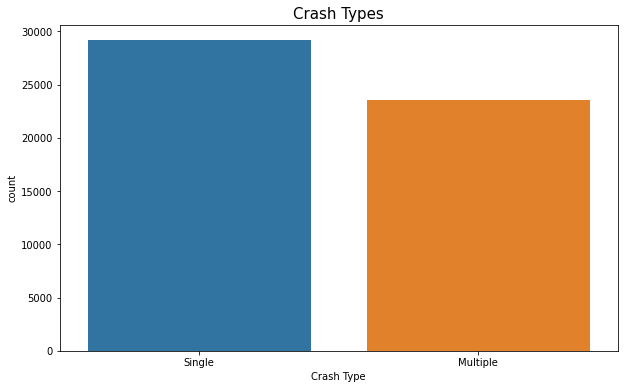

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(car_data["Crash Type"])
plt.title("Crash Types", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


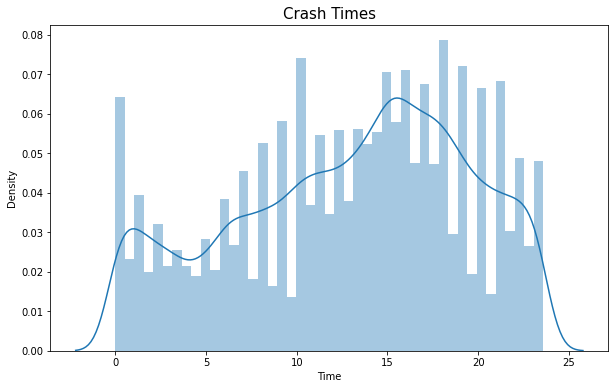

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(car_data["Time"])
plt.title("Crash Times", size=15)
plt.show()

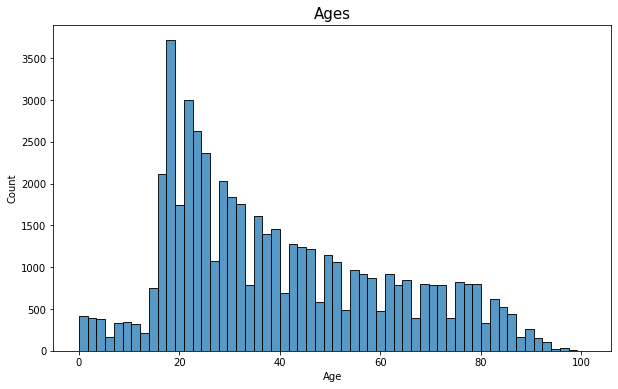

In [ ]:
# Removing the Impossible Values for "Age" Column
car_data.sort_values(by="Age")
car_data = car_data[car_data["Age"] >= 0]
plt.figure(figsize=(10,6))
sns.histplot(car_data["Age"])
plt.title("Ages", size=15)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


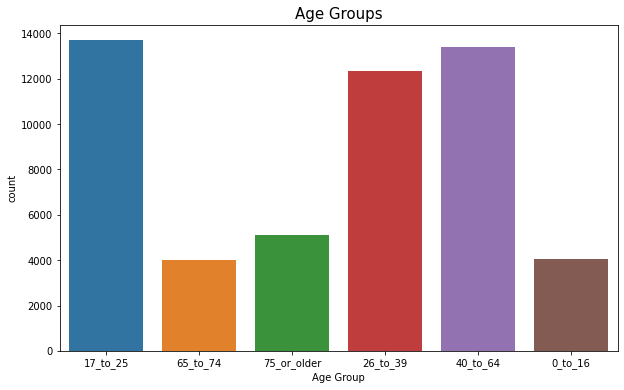

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(car_data["Age Group"])
plt.title("Age Groups", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


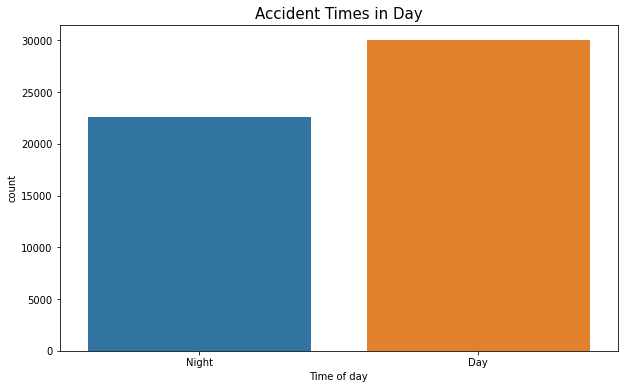

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(car_data["Time of day"])
plt.title("Accident Times in Day", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


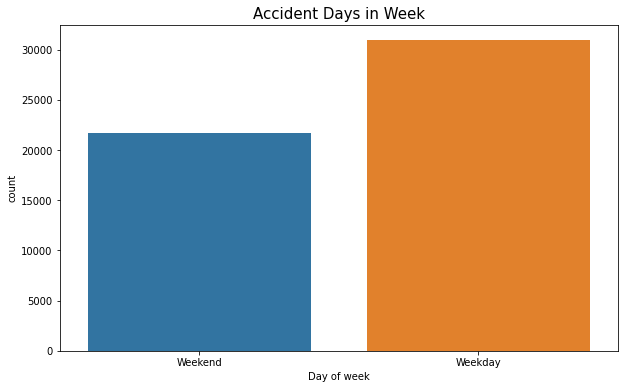

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(car_data["Day of week"])
plt.title("Accident Days in Week", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


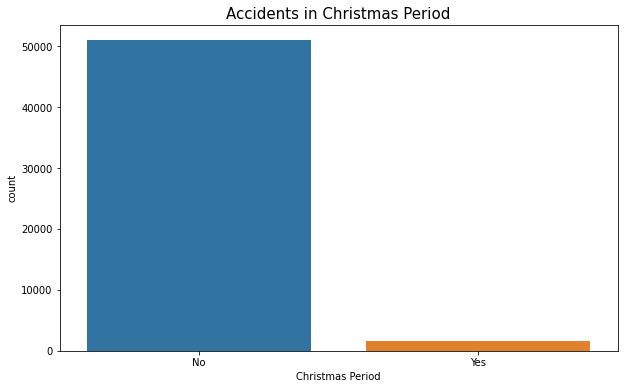

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(car_data["Christmas Period"])
plt.title("Accidents in Christmas Period", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


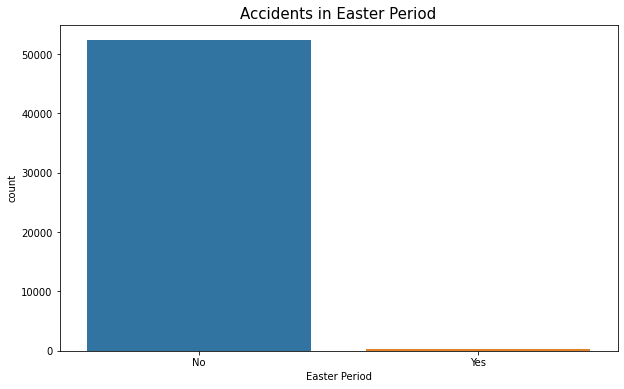

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(car_data["Easter Period"])
plt.title("Accidents in Easter Period", size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Male           37681
Female         14922
Unspecified        1
Name: Gender, dtype: int64


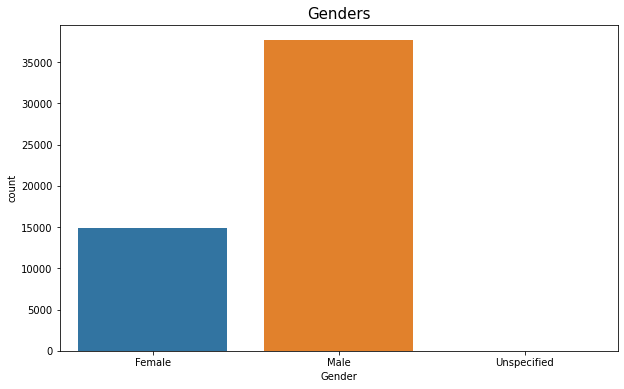

In [ ]:
print(car_data["Gender"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(car_data["Gender"])
plt.title("Genders", size=15)
plt.show()

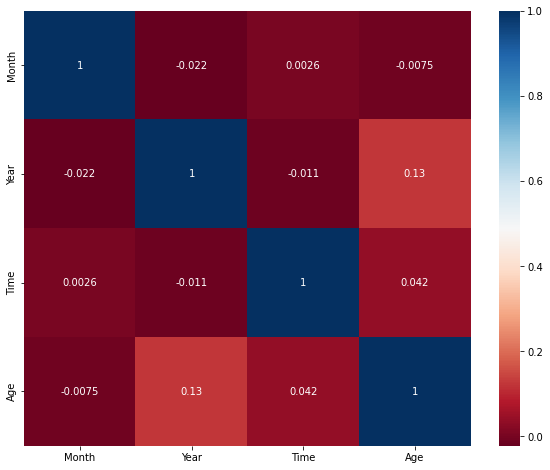

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(car_data.corr(), annot=True, cmap="RdBu")
plt.show()

In [ ]:
car_data.sample(5)

,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
17387,Vic,2,2008,Wednesday,1.45,Multiple,No,Yes,100,Driver,Male,44,No,No,40_to_64,Weekday,Night
29098,SA,11,2010,Tuesday,13.00,Multiple,No,No,100,Driver,Female,41,No,No,40_to_64,Weekday,Day
5639,NSW,9,1993,Wednesday,12.15,Multiple,No,No,110,Pedestrian,Female,52,No,No,40_to_64,Weekday,Day
18826,NSW,2,2011,Thursday,3.45,Single,No,No,100,Driver,Male,47,No,No,40_to_64,Weekday,Night
22042,Tas,3,2004,Wednesday,16.25,Single,No,No,100,Motorcycle rider,Male,60,No,No,40_to_64,Weekday,Day


In [ ]:
Dayweek = car_data["Dayweek"]
SpeedLimit = car_data["Speed Limit"]


print(car_data.dtypes)
SpeedLimit.head(10)

Dayweek.head(10)

State                             object
Month                              int64
Year                               int64
Dayweek                           object
Time                             float64
Crash Type                        object
Bus Involvement                   object
Articulated Truck Involvement     object
Speed Limit                       object
Road User                         object
Gender                            object
Age                                int64
Christmas Period                  object
Easter Period                     object
Age Group                         object
Day of week                       object
Time of day                       object
dtype: object


0     Saturday
1       Monday
2     Saturday
3    Wednesday
4     Saturday
5     Saturday
6    Wednesday
7    Wednesday
8     Saturday
9     Saturday
Name: Dayweek, dtype: object

In [ ]:
obj_car_data = car_data.select_dtypes(include=['object']).copy()
obj_car_data.head()

,State,Dayweek,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,WA,Saturday,Single,No,No,80,Passenger,Female,No,No,17_to_25,Weekend,Night
1,SA,Monday,Multiple,No,Yes,100,Driver,Male,No,No,65_to_74,Weekday,Day
2,Vic,Saturday,Single,No,No,60,Pedestrian,Male,No,No,75_or_older,Weekend,Night
3,NT,Wednesday,Single,No,No,70,Pedestrian,Male,No,No,26_to_39,Weekday,Night
4,WA,Saturday,Single,No,No,60,Passenger,Male,No,No,17_to_25,Weekend,Night


In [ ]:
obj_car_data["Dayweek"].value_counts()
obj_car_data["Bus Involvement"].value_counts()
obj_car_data["Articulated Truck Involvement"].value_counts()
obj_car_data["Road User"].value_counts()
obj_car_data["Gender"].value_counts()
obj_car_data["Christmas Period"].value_counts()
obj_car_data["Easter Period"].value_counts()
obj_car_data["Age Group"].value_counts()
obj_car_data["Day of week"].value_counts()
obj_car_data["Time of day"].value_counts()
obj_car_data["State"].value_counts()


NSW    16191
Vic    11517
Qld    10459
WA      6254
SA      4533
NT      1629
Tas     1546
ACT      475
Name: State, dtype: int64

In [ ]:
encode = {  "Dayweek": {"Sunday": 1, "Monday": 2, "Tuesday" : 3, "Wednesday" : 4,  "Thursday" : 5,  "Friday": 6, "Saturday": 7}, 
            "Crash Type" : {"Single": 1, "Multiple": 2}, 
            "Bus Involvement": {"No":0, "Yes":1 }, 
            "Articulated Truck Involvement": {"No":0, "Yes":1 },  
            "Road User": {"Driver":1, "Passenger": 2, "Pedestrian": 3, "Motorcycle rider": 4, "Pedal cyclist" : 5,    "Motorcycle pillion passenger" : 6,   "Other/-9" :7}, 
            "Gender" : {"Male": 1, "Female":2, "Unspecified":3}, 
            "Christmas Period": {"No":0, "Yes":1}, 
            "Easter Period": {"No":0, "Yes":1}, 
            "Age Group": {"17_to_25": 2, "0_to_16":1, "26_to_39":3, "40_to_64":4, "65_to_74": 5, "75_or_older":6}, 
            "Day of week" : {"Weekday":1, "Weekend":0 },
            "Time of day":{"Day":1, "Night":0},
            "State" : {"NSW":1, "Vic":2, "Qld":3, "WA":4, "SA": 5,"NT":6,"Tas":7, "ACT":8 }  
                    
                                                   }
car_data = car_data.replace(encode)
car_data.head()

,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,4,2,1995,7,2.30,1,0,0,80,2,2,18,0,0,2,0,0
1,5,6,2013,2,8.50,2,0,1,100,1,1,71,0,0,5,1,1
2,2,6,2006,7,18.35,1,0,0,60,3,1,84,0,0,6,0,0
3,6,4,1995,4,21.31,1,0,0,70,3,1,33,0,0,3,1,0
4,4,6,1996,7,23.09,1,0,0,60,2,1,24,0,0,2,0,0


In [ ]:
# car_data["Speed Limit"] = float(car_data["Speed Limit"])
car_data['Speed Limit'] = pd.to_numeric(car_data['Speed Limit'],errors='coerce')

car_data['Speed Limit']= (car_data['Speed Limit']-car_data['Speed Limit'].min())/(car_data['Speed Limit'].max()-car_data['Speed Limit'].min())





In [ ]:
car_data

,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,4,2,1995,7,2.30,1,0,0,0.640288,2,2,18,0,0,2,0,0
1,5,6,2013,2,8.50,2,0,1,0.784173,1,1,71,0,0,5,1,1
2,2,6,2006,7,18.35,1,0,0,0.496403,3,1,84,0,0,6,0,0
3,6,4,1995,4,21.31,1,0,0,0.568345,3,1,33,0,0,3,1,0
4,4,6,1996,7,23.09,1,0,0,0.496403,2,1,24,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,3,5,1989,3,18.00,1,0,0,0.496403,3,1,41,0,0,4,1,0
52839,2,1,2015,5,6.51,1,0,0,0.568345,1,1,28,1,0,3,1,1
52840,4,11,1996,3,6.15,2,0,0,0.856115,1,1,18,0,0,2,1,1
52841,1,9,1999,6,18.45,1,0,0,0.712230,3,1,19,0,0,2,0,0


In [ ]:
car_data['Age']= (car_data['Age']-car_data['Age'].min())/(car_data['Age'].max()-car_data['Age'].min())

In [ ]:
car_data

,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,4,2,1995,7,2.30,1,0,0,0.640288,2,2,0.178218,0,0,2,0,0
1,5,6,2013,2,8.50,2,0,1,0.784173,1,1,0.702970,0,0,5,1,1
2,2,6,2006,7,18.35,1,0,0,0.496403,3,1,0.831683,0,0,6,0,0
3,6,4,1995,4,21.31,1,0,0,0.568345,3,1,0.326733,0,0,3,1,0
4,4,6,1996,7,23.09,1,0,0,0.496403,2,1,0.237624,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,3,5,1989,3,18.00,1,0,0,0.496403,3,1,0.405941,0,0,4,1,0
52839,2,1,2015,5,6.51,1,0,0,0.568345,1,1,0.277228,1,0,3,1,1
52840,4,11,1996,3,6.15,2,0,0,0.856115,1,1,0.178218,0,0,2,1,1
52841,1,9,1999,6,18.45,1,0,0,0.712230,3,1,0.188119,0,0,2,0,0


In [ ]:
car_data['Time']= (car_data['Time']-car_data['Time'].min())/(car_data['Time'].max()-car_data['Time'].min())


,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,4,2,1995,7,0.097499,1,0,0,0.640288,2,2,0.178218,0,0,2,0,0
1,5,6,2013,2,0.360322,2,0,1,0.784173,1,1,0.702970,0,0,5,1,1
2,2,6,2006,7,0.777872,1,0,0,0.496403,3,1,0.831683,0,0,6,0,0
3,6,4,1995,4,0.903349,1,0,0,0.568345,3,1,0.326733,0,0,3,1,0
4,4,6,1996,7,0.978805,1,0,0,0.496403,2,1,0.237624,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,3,5,1989,3,0.763035,1,0,0,0.496403,3,1,0.405941,0,0,4,1,0
52839,2,1,2015,5,0.275964,1,0,0,0.568345,1,1,0.277228,1,0,3,1,1
52840,4,11,1996,3,0.260704,2,0,0,0.856115,1,1,0.178218,0,0,2,1,1
52841,1,9,1999,6,0.782111,1,0,0,0.712230,3,1,0.188119,0,0,2,0,0


In [ ]:
car_data = car_data.drop(["Year"], axis =1)

In [ ]:
car